In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline
from pylab import get_cmap
import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg-frozen-2018-07-18/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

In [6]:
import matplotlib as mpl



# 1) Textlength

In [7]:
meta.reset()

path_text = os.path.abspath(os.path.join(src_meta,os.pardir,'data','text'))
list_N = []
for file in list(glob.glob( path_text+'/PG*_text.txt' )):
    with open(file) as f:
        x = f.readlines()
    N = len(x)
    list_N += [N]

# 2) Find all books that could have been written at a given time 

Note we only have the year of the authors' birth and death

In [8]:
## get all records that have information on yearofauthorbirth and yearof authordeath
meta.reset()
meta.filter_year([-10000,10000])

In [9]:
meta.df

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],518.0,"{'United States. Declaration of Independence',...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],42.0,{'United States -- Foreign relations -- 1961-1...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],71.0,"{'Lincoln, Abraham, 1809-1865. Gettysburg addr...",Text
6,PG6,Give Me Liberty or Give Me Death,"Henry, Patrick",1736.0,1799.0,['en'],49.0,{'Virginia -- Politics and government -- 1775-...,Text
8,PG8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],43.0,{'United States -- Politics and government -- ...,Text
9,PG9,Abraham Lincoln's First Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],48.0,{'United States -- Politics and government -- ...,Text
15,PG15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],828.0,"{'Whaling -- Fiction', 'Sea stories', 'Ahab, C...",Text
17,PG17,The Book of Mormon: An Account Written by the ...,"Smith, Joseph, Jr.",1805.0,1844.0,['en'],203.0,"{'Mormon Church -- Sacred books', 'Church of J...",Text
18,PG18,The Federalist Papers,"Madison, James",1751.0,1836.0,['en'],352.0,{'Constitutional history -- United States -- S...,Text
19,PG19,The Song of Hiawatha,"Longfellow, Henry Wadsworth",1807.0,1882.0,['en'],229.0,{'Iroquois Indians -- Kings and rulers -- Poet...,Text


In [10]:
hmin = 20 ## consider minimum age to write a book as 20
list_tmin = np.array(meta.df['authoryearofbirth'])+hmin
list_tmax = np.array(meta.df['authoryearofdeath'])

In [13]:
t1 = min(list_tmin)
t2 = max(list_tmax)

arr_t2 = np.arange(t1,t2+1,1)
arr_n2 = 0*arr_t2
for i_t,t in enumerate(arr_t2):
    n = len( np.where( (list_tmin<=t)&(list_tmax>=t) )[0] )
    arr_n2[i_t] = n

# 3) All books from a language

In [14]:
meta.reset()
c_languages = meta.get_lang_counts()
arr_n = []
arr_l = []
for l,n in c_languages.most_common():
    arr_n += [n]
    arr_l += [l]
arr_n = np.array(arr_n)
arr_l = np.array(arr_l)

In [15]:
## number of tokens in each language
# i_l = 0
# l = arr_l[i_l]
path_text = os.path.abspath(os.path.join(src_meta,os.pardir,'data','counts'))

list_n_tokens = []
for i_l,l in enumerate(arr_l):
    print(l)
    n_tokens = 0
    meta.reset()
    meta.filter_lang(l)
    list_books = meta.get_ids()
    for pg_id in list_books:
        filename = os.path.join(path_text,'%s_counts.txt'%(pg_id))
        with open(filename) as f:
            x = f.readlines()
        if len(x)>1:
            list_n = [int(h.split()[1]) for h in x]
            N = sum(list_n)
            n_tokens+=N
    list_n_tokens += [n_tokens]

en
fr
fi
de
nl
it
es
pt
zh
el
sv
hu
eo
la
da
tl
ca
pl
ja
no
cy
cs
is
enm
fur
te
bg
he
ru
ang
af
nai
sr
nah
ilo
ceb
grc
ro
myn
ga
fy
mi
nav
arp
gla
brx
sa
ale
kha
ia
kld
oc
nap
gl
br
iu
bgs
csb
rmr
sl
oji
ar
et
fa


# Plot

In [42]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 12,
          'text.fontsize': 12,
          'legend.fontsize': 8,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : True,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


In [43]:
from matplotlib import rc
rc('text', usetex=True)

In [44]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


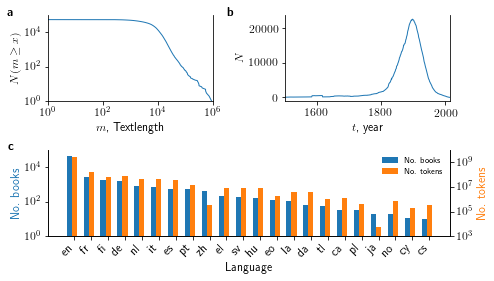

In [45]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), tight_layout=True)
fig = plt.figure(figsize=(7,4), tight_layout=True)


# color = red
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

###############
ax = ax1

n = len(list_N)
x = np.sort(np.array(list_N))
y = (np.arange(n)+1)

ax.plot(x,n-y,lw=1)
ax.set_xlabel(r'$m$, Textlength')
ax.set_ylabel(r'$N(m \geq x)$')

# ax.set_ylim(0.00001,1)
ax.set_ylim(1,10**5)

ax.set_xlim(10**0,10**6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.annotate(r'\textbf{a}',xy=(-0.25,1.0),xycoords = 'axes fraction',)

#########
ax = ax2
x = arr_t2
y = arr_n2
ax.plot(x,y,lw=1)
ax.set_xlabel(r'$t$, year')
ax.set_ylabel(r'$N$')

ax.set_xlim(1500,2015)
ax.annotate(r'\textbf{b}',xy=(-0.35,1.0),xycoords = 'axes fraction',)

###################
ax = ax3

indmax = 22#len(arr_n)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

c0 = cmap(0)
x = np.arange(indmax)+0.2
y = arr_n[:indmax]
z = arr_l[:indmax]
p1 =ax.bar(x,y,width = 0.3,label='No. books',color=c0)

c1 = cmap(1)
x = np.arange(indmax)+0.5
y = list_n_tokens[:indmax]
z = arr_l[:indmax]
p2=ax.bar(x,0.0*np.array(y),width = 0.3,label='No. tokens',color=c1)
p2=ax2.bar(x,y,width = 0.3,label='No. tokens',color=c1)


ax.set_xlabel(r'Language')
ax.set_ylabel(r'No. books',color=c0)



ax.set_xticks(x)
ax.set_xticklabels(z,rotation=45, ha='right')

# ax.set_xlim(1500,2015)
# ax.set_ylim(1,10**5)

ax.set_ylim(1,10**5)
# ax.set_xscale('log')
ax.set_yscale('log')

ax2.set_ylim(1,10**10)
# ax.set_xscale('log')
ax2.set_yscale('log')


ax2.set_ylabel('No. tokens',color=c1)
ax2.set_ylim(10**3,10**10)
ax2.set_yticks([10**3,10**5,10**7,10**9])

ax.legend(loc='upper right',frameon=False)


ax.annotate(r'\textbf{c}',xy=(-0.1,1.0),xycoords = 'axes fraction',)

##############

fig.savefig("../figures/basicstats_combined.pdf")

In [34]:
# # fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), tight_layout=True)
# fig = plt.figure(figsize=(7,4), tight_layout=True)


# # color = red
# ax1 = plt.subplot(221)
# ax2 = plt.subplot(222)
# ax3 = plt.subplot(212)

# ###############
# ax = ax1

# n = len(list_N)
# x = np.sort(np.array(list_N))
# y = (np.arange(n)+1)

# ax.plot(x,n-y,lw=1)
# ax.set_xlabel(r'$m$, Textlength')
# ax.set_ylabel(r'$N(m \geq x)$')

# # ax.set_ylim(0.00001,1)
# ax.set_ylim(1,10**5)

# ax.set_xlim(10**0,10**6)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.annotate(r'\textbf{a}',xy=(-0.25,1.0),xycoords = 'axes fraction',)

# #########
# ax = ax2
# x = arr_t2
# y = arr_n2
# ax.plot(x,y,lw=1)
# ax.set_xlabel(r'$t$, year')
# ax.set_ylabel(r'$N$')

# ax.set_xlim(1500,2015)
# ax.annotate(r'\textbf{b}',xy=(-0.35,1.0),xycoords = 'axes fraction',)

# ###################
# ax = ax3

# indmax = 22#len(arr_n)

# x = np.arange(indmax)
# y = arr_n[:indmax]
# z = arr_l[:indmax]

# ax.bar(x,y,width = 0.5)
# ax.set_xlabel(r'Language')
# ax.set_ylabel(r'$N$')

# ax.set_xticks(x)
# ax.set_xticklabels(z,rotation=45, ha='right')

# # ax.set_xlim(1500,2015)
# # ax.set_ylim(1,10**5)

# ax.set_ylim(1,10**5)
# # ax.set_xscale('log')
# ax.set_yscale('log')
# ax.annotate(r'\textbf{c}',xy=(-0.1,1.0),xycoords = 'axes fraction',)

# ##############

# fig.savefig("../figures/basicstats_combined.pdf")